In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 2: Load Dataset
file_path = "Data/features_30_sec.csv"
df = pd.read_csv(file_path)
print("Data Loaded! Shape:", df.shape)

Data Loaded! Shape: (1000, 60)


In [3]:
# Step 3: Encode Labels and Prepare Features
X = df.drop(columns=["filename", "label"])
y = df["label"]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [4]:
# Step 4: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

In [5]:
# Step 5: Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [6]:
# Step 6: Build MLP Model
model = Sequential([
Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
Dropout(0.3),
Dense(128, activation='relu'),
Dropout(0.3),
Dense(64, activation='relu'),
Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        15,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,906 (222.29 KB)

 Trainable params: 56,906 (222.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 7: Train the Model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 234ms/step - accuracy: 0.2862 - loss: 1.9848 - val_accuracy: 0.4000 - val_loss: 1.7017
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.4462 - loss: 1.5236 - val_accuracy: 0.5400 - val_loss: 1.4093
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.5537 - loss: 1.2306 - val_accuracy: 0.5500 - val_loss: 1.1964
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6087 - loss: 1.0822 - val_accuracy: 0.5950 - val_loss: 1.1388
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.6587 - loss: 0.9183 - val_accuracy: 0.6050 - val_loss: 1.0384
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6963 - loss: 0.8516 - val_accuracy: 0.6100 - val_loss: 1.0329
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7325 - loss: 0.7530 - val_accuracy: 0.6650 - val_loss: 0.9450
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7325 - loss: 0.7325 - val_accuracy: 0.620

In [8]:
# Step 8: Save Model and Label Encoder
model.save("music_genre_model.h5")
joblib.dump(label_encoder, "label_encoder.pkl")
print("Model and label encoder saved.")

Model and label encoder saved.


In [9]:
# Step 9: Evaluate
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.7250 - loss: 0.9646
Validation Accuracy: 0.7250


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step


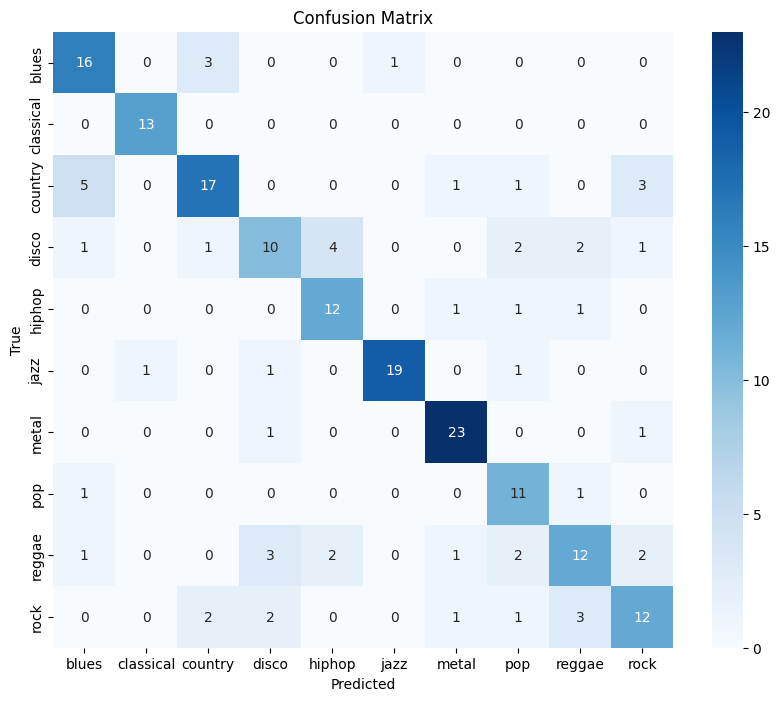

In [10]:
# Step 10: Confusion Matrix
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)


cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
# Step 11: Classification Report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

       blues       0.67      0.80      0.73        20
   classical       0.93      1.00      0.96        13
     country       0.74      0.63      0.68        27
       disco       0.59      0.48      0.53        21
      hiphop       0.67      0.80      0.73        15
        jazz       0.95      0.86      0.90        22
       metal       0.85      0.92      0.88        25
         pop       0.58      0.85      0.69        13
      reggae       0.63      0.52      0.57        23
        rock       0.63      0.57      0.60        21

    accuracy                           0.72       200
   macro avg       0.72      0.74      0.73       200
weighted avg       0.73      0.72      0.72       200

